<a href="https://colab.research.google.com/github/Pallavi20004/level2/blob/main/Naive_Bayes_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######Step 1: Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score


######Step 2: Load the Iris Dataset

In [ ]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
print(data.head(10))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

######Step 3: Visualize Target Class Distribution

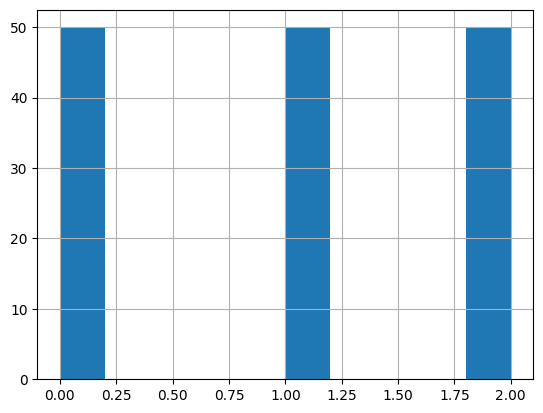

In [ ]:
data['target'].hist()  # Visualizing the distribution of the target labels
plt.show()


######Step 4: Correlation Heatmap

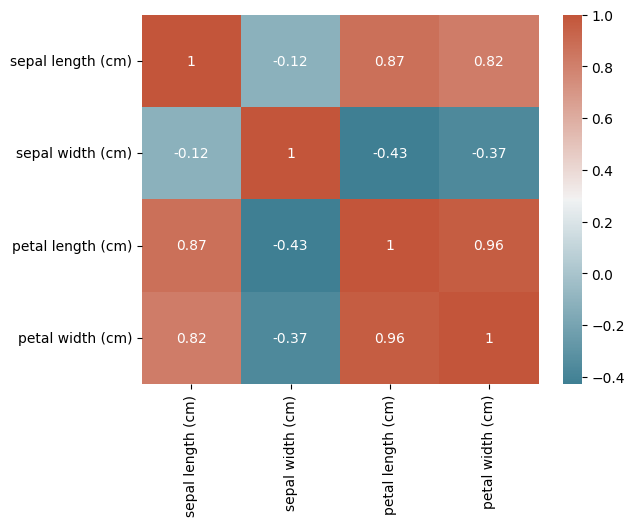

In [ ]:
correlations = data.iloc[:, :-1].corr(method="pearson")
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlations, cmap=cmap, annot=True)
plt.show()


#####Step 5: Feature Distribution Visualization

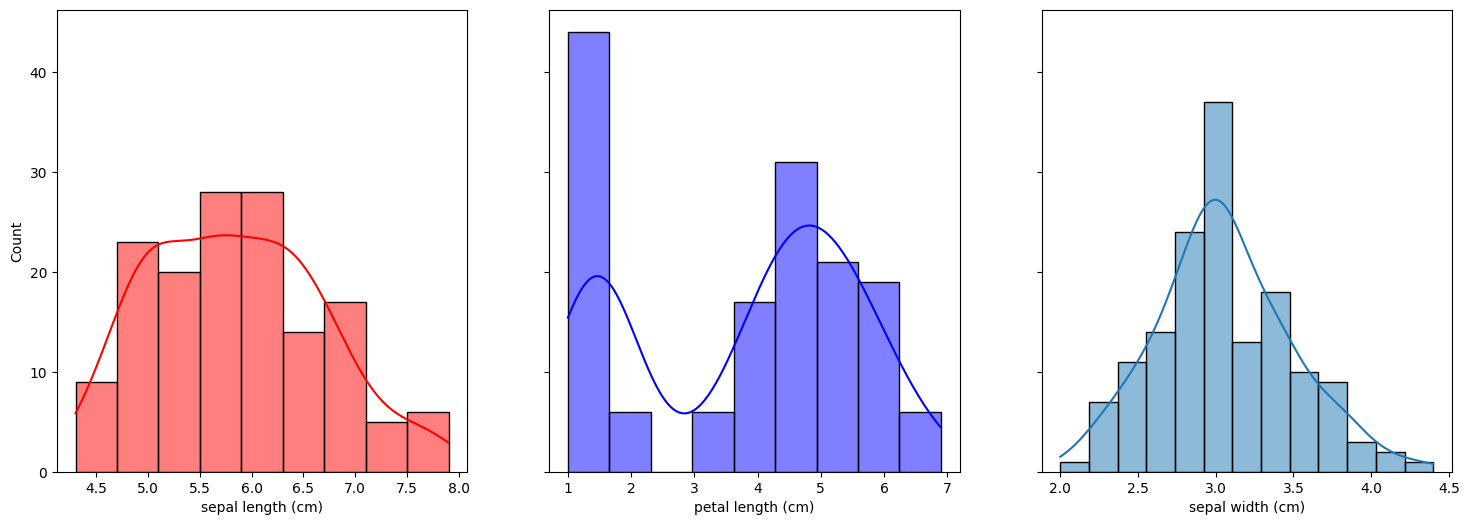

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="sepal length (cm)", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="petal length (cm)", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="sepal width (cm)", kde=True)
plt.show()


######Step 6: Prior Probability Calculation

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior


######Step 7: Gaussian Likelihood Calculation

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    df = df[df[Y]==label]  # Filter data for a given class label
    mean, std = df[feat_name].mean(), df[feat_name].std()  # Calculate mean and standard deviation
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y


###### Step 8: Naive Bayes Classifier Implementation

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]  # All feature columns except target
    prior = calculate_prior(df, Y)  # Calculate prior probabilities

    Y_pred = []
    for x in X:  # For each data sample
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)  # Initialize likelihood

        # Calculate likelihood for each class
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [likelihood[j] * prior[j] for j in range(len(labels))]  # Compute posterior
        Y_pred.append(np.argmax(post_prob))  # Choose the class with the highest posterior

    return np.array(Y_pred)


######Step 9: Model Testing and Evaluation

In [ ]:
train, test = train_test_split(data, test_size=.2, random_state=42)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="target")

# Confusion matrix and F1 score to measure performance
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='macro'))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
